In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas
raw_housing_data = pandas.read_csv("/kaggle/input/regression-model/1. Regression - Module - (Housing Prices).csv")


In [5]:
raw_housing_data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [8]:
raw_housing_data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [12]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [19]:
raw_housing_data2 = pandas.read_csv("/kaggle/input/regressionmodel3/Raw_Housing_Prices3.csv")


In [20]:
raw_housing_data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [22]:
raw_housing_data['No of Times Visited'].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [25]:
mapping = {'None': "0",
           'Once': '1',
           'Twice': '2',
           'Thrice': '3',
           'Four' : '4'
          }
raw_housing_data['No of Times Visited']=raw_housing_data['No of Times Visited'].map(mapping)

In [33]:
raw_housing_data['No of Times Visited'].unique()

array([nan], dtype=object)

In [35]:
raw_housing_data['Sale Price'].corr(raw_housing_data['Flat Area (in Sqft)'])

0.7020813781769125

correlation is the measure of the dependence or association between two variables i.e how one variable changes with other


In [37]:
np.corrcoef(raw_housing_data['Sale Price'],raw_housing_data['Flat Area (in Sqft)'])

array([[ 1., nan],
       [nan, nan]])

In [38]:
import pandas as pd
data = pd.read_csv('/kaggle/input/regressionmodel2/Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900,3,1.00,1180,5650,1.0,0,7,1180,0,...,0,0,0,0,0,0,0,0,0,0
1,538000,3,2.25,2570,7242,2.0,0,7,2170,400,...,0,0,1,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,0,6,770,0,...,0,0,1,0,0,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,7,1050,910,...,0,0,0,1,0,0,0,0,0,0
4,510000,3,2.00,1680,8080,1.0,0,8,1680,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

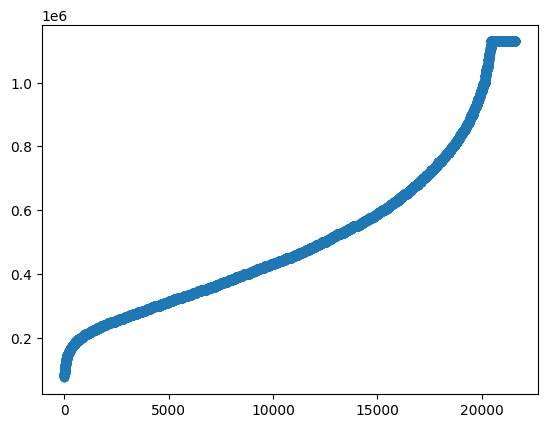

In [49]:
import matplotlib.pyplot as plt
plt.figure(dpi = 100)
k = range(0,len(data))
plt.scatter(k,data['Sale_Price'].sort_values())

In [54]:
data = data.rename(columns={'Sale_Price':'Sale Price'})

In [55]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales
0,221900,3,1.00,1180,5650,1.0,0,7,1180,0,...,0,0,0,0,0,0,0,0,0,511618.558147
1,538000,3,2.25,2570,7242,2.0,0,7,2170,400,...,0,1,0,0,0,0,0,0,0,511618.558147
2,180000,2,1.00,770,10000,1.0,0,6,770,0,...,0,1,0,0,0,0,0,0,0,511618.558147
3,604000,4,3.00,1960,5000,1.0,0,7,1050,910,...,0,0,1,0,0,0,0,0,0,511618.558147
4,510000,3,2.00,1680,8080,1.0,0,8,1680,0,...,0,0,0,1,0,0,0,0,0,511618.558147


feature scaling the last stage of the data preprocessing

In [56]:
Y = data.iloc[:,0]
X = data.iloc[:,1:31]

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  int64  
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  int64  
 4   Lot Area (in Sqft)                         21609 non-null  int64  
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  int64  
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

In [59]:
X.head(5)

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180,5650,1.0,0,7,1180,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570,7242,2.0,0,7,2170,400,67,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,6,770,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,7,1050,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,8,1680,0,31,...,0,0,0,0,1,0,0,0,0,0


In [61]:
Y.tail()

21604    360000
21605    400000
21606    402101
21607    400000
21608    325000
Name: Sale Price, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [63]:
X_train.shape

(15126, 30)

In [64]:
X_test.shape

(6483, 30)

In [65]:
Y_train.shape

(15126,)

In [69]:
Y_test.shape

(6483,)